# ```numpy``` 연습

예를 들어 다음과 같은 2차원 행렬이 있다고 하자.

In [1]:
import numpy as np
M = np.arange(25).reshape(5,5)
M

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

#### 1.```M```의 행의 수와 열의 수를 구하는 코드를 작성하고, 각각 ```n```과 ```m```이라 하자.

In [2]:
n = M.shape[0] #행의 수
m = M.shape[1] #열의 수
print("row:",n)
print("column:",m)

row: 5
column: 5


#### 2. 다음 각각을 수행할 수 있는 코드들을 작성하라. 위에서 정의한 ```n```과 ```m```을 이용하고, 각 결과는 1차원 array로 하라



* ```M```의 첫번째 행(즉, 행 index는 0)을 선택하는 코드

In [3]:
A = M[0, 0:m]
A

array([0, 1, 2, 3, 4])

* ```M```의 마지막 열의 두번째 행부터 마지막 n-1번째 행까지 선택하는 코드, 즉, 위 예제에서는 ```9, 14, 19```를 선택할 수 있어야 함.

In [4]:
B = M[1:n-1,m-1]
B

array([ 9, 14, 19])

* ```M```의 마지막 행을 역순으로 선택하는 코드. 즉, 위 예제에서는 ```24, 23, 22, 21, 20```

In [5]:
a = M[n-1,0:m]
C = a[::-1]
C

array([24, 23, 22, 21, 20])

* ```M```의 첫번째 열을 마지막 n-1번쨰 행에서 두번째 행까지 선택하는 코드. 즉, 위 예제에서는 ```15, 10, 5```

In [6]:
a = M[1:n-1,0]
D = a[::-1]
D

array([15, 10,  5])

#### 3.위에서 선택한 array들을 ```np.r_```를 이용하여 하나로 만들라. 즉, 결과는 1차원 array로 ```[0, 1, 2, 3, 4, 9, 14, 19, 24, 23, 22, 21, 20, 15, 10, 5]```이어야 한다.

In [7]:
F = np.r_[A, B, C, D]
F

array([ 0,  1,  2,  3,  4,  9, 14, 19, 24, 23, 22, 21, 20, 15, 10,  5])

#### 4. 원래의 ```M```에서 3번에서 선택한 값들을 제외하고 남은 부분을 선택하는 코드를 만들라. 즉, 결과는 ```[[6, 7, 8], [11, 12, 13], [16, 17, 18]]```

In [8]:
#sol(1)
mans=[]  
F_list = list(F) # remove를 사용하기 위해 F를 list로 만든다

for x in M:
    for y in x:
        mans.append(y)  # M 행렬의 성분들을 mans에 append 해서 list로 만든다!


for x in mans.copy():
    if x in F_list:
        mans.remove(x)  # mans 와 F_list의 값을 비교해서 mans 안에 있는 F_list 값을 삭제

mama = np.array(mans)   # list mans를 행렬로 표현하기 위한 작업
mama = mama.reshape(3,3)
print(mama)


[[ 6  7  8]
 [11 12 13]
 [16 17 18]]


In [9]:
#sol(2)
ans = []

for i in M:
    for t in i:
        if t not in F:
            ans.append(t)
matrix = np.array(ans).reshape(3,3)

matrix

array([[ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [10]:
#sol(3) use list comprehension  
flat =[n for row in M for n in row if n not in F]
matrix = np.array(flat).reshape(3,3)
print(matrix)

[[ 6  7  8]
 [11 12 13]
 [16 17 18]]


#### 5.남은 행렬에 2-3번의 과정을 반복하라. 즉, 남은 행렬의 가장자리 부분을 왼쪽 위에서부터 시계 방향으로 한 바퀴 돌아 선택하여 결과는 ```[6, 7, 8, 13, 18, 17, 16, 11]```

In [11]:
T=mama
T

array([[ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

In [12]:
n = T.shape[0] 
m = T.shape[1] 

A1 = T[0, 0:m]

B1 = T[1:n-1,m-1]

a1 = T[n-1,0:m]
C1 = a1[::-1]

a2 = T[1:n-1,0]
D1 = a2[::-1]

F1 = np.r_[A1, B1, C1, D1]
F1

array([ 6,  7,  8, 13, 18, 17, 16, 11])

#### 6. ```.reshape(-1)```을 이용하여 ```n by 1``` 혹은 ```1 by m``` 의 2차원 array를 1차원 array로 바꿀 수 있음을 확인하라. 몇 가지 예제로 테스트해 보라.

In [13]:
a = np.array([[1,2,3,4]]) 

#x.reshape(-1)은 x.reshape(1, -1)과 같이 1차원 배열을 반환.

a.reshape(-1)

array([1, 2, 3, 4])

In [14]:
b = np.array([[1],
              [2],
              [3]])
b.reshape(-1)

array([1, 2, 3])

#### 7. 위에서 학습한 내용과 반복문을 이용하여, 임의의 ```n by m```2차원 array에 대해 다음의 결과에 해당하는 1-d array를 찾는 코드를 작성하라

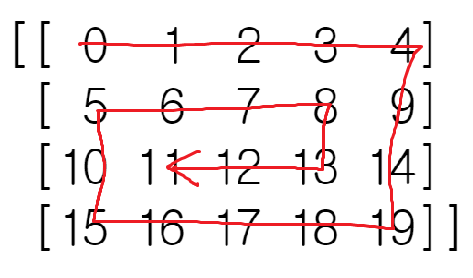

In [15]:
M = np.arange(20).reshape(4,5)
M

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### 풀이
1. 전체 행렬을 4개의 파트로 나누어서 반복문을 돌린다.
    ex) 0-4, 9-4, 19-15, 10-5
2. 첫 번째 반복문이 끝나면 4개의 파트로 추출하면 성분들 ```np.r_```로 합친다.
3. 합친 성분들을 리스트를 만들고(append를 이용하기 위해 ) 빈 리스트 ```chosen```에 ```append``` 한다.
4. 반복문이 끝날 때 마다 ```counter```를 증가시키고 2번째 set를 뽑기 위해 ```counter```를 적절히 빼고 더한다.
5. ```if row - counter *2 > 1 and column - counter *2 > 1``` 이렇게 해당 행렬의 row 와 column에 따라 반복을 얼마나 할 지 정함.
6. 위에 해당하지 않는 성분은 ```4번```에 썼던 풀이를 이용하여 따로 추출.  -> 남은 성분
7. 남은 성분도 ```notchosen```이란 빈 리스트에 ```append```해서 1-d array로 만듦.
8. 낭은 성분은 row와 column의 수에 따라 ```reshape```을 어떻게 할 지 설정.
9. 마지막으로 리스트였던 ```chosen```과 ```notchosen```을 ```np.r_```로 합쳐서 출력.


In [16]:
def snake(ma):
    row = ma.shape[0]   # 행
    column = ma.shape[-1]  # 열
    counter = 0   
    chsoen = []
    while True:
        if row - counter *2 > 1 and column - counter *2 > 1 :

            if column - counter * 2 > 1 :
                A = ma[counter, counter : column - counter]

            if row - counter * 2 > 1:
                B = ma[1 + counter : row - 1 - counter, column - 1 - counter]

            if column - counter * 2 > 1:
                a = ma[row - 1 - counter, 0 + counter : column - counter]
                C = a[::-1]

            if row - counter * 2 > 1:
                b = ma[1 + counter : row - 1 - counter, 0 + counter]
                D = b[::-1]  


            G = np.r_[A, B, C, D]
            G_list = list(G)
            chsoen.append(G_list)

            counter = counter + 1
        else:
            break

    result = [] 
    for q in chsoen:
        for w in q:
            result.append(w)

    mat=np.array(result)  

    notchsoen = []   # 4번 문제 이용
    for i in ma:
        for t in i:
            if t not in mat:
                notchsoen.append(t) 

    if row > column:
        matrix = np.array(notchsoen).reshape(-1, 1)   # row와 column의 개수에 따라 남는 행렬의 케이스 분류
        mat2 = matrix.reshape(-1)
        final = np.r_[mat, mat2] 
        
    elif row < column:
        matrix = np.array(notchsoen).reshape(1, -1)
        mat2 = matrix.reshape(-1)
        final=np.r_[mat, mat2]

    elif row % 2 == 0 and column % 2 == 0:
        final = mat

    else:
        if row == column:
            matrix = np.array(notchsoen).reshape(1, 1)
            mat2 = matrix.reshape(-1)
            final = np.r_[mat, mat2]
            
    return final


In [17]:
print(snake(M))

[ 0.  1.  2.  3.  4.  9. 14. 19. 18. 17. 16. 15. 10.  5.  6.  7.  8. 13.
 12. 11.]


In [18]:
A = np.arange(30).reshape(6,5)
print(A)
print("1-d array",snake(A))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
1-d array [ 0  1  2  3  4  9 14 19 24 29 28 27 26 25 20 15 10  5  6  7  8 13 18 23
 22 21 16 11 12 17]


In [19]:
B = np.arange(35).reshape(7,5)
print(B)
print("1-d array",snake(B))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]
1-d array [ 0  1  2  3  4  9 14 19 24 29 34 33 32 31 30 25 20 15 10  5  6  7  8 13
 18 23 28 27 26 21 16 11 12 17 22]


In [20]:
C = np.arange(35).reshape(5,7)
print(C)
print("1-d array",snake(C))

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
1-d array [ 0  1  2  3  4  5  6 13 20 27 34 33 32 31 30 29 28 21 14  7  8  9 10 11
 12 19 26 25 24 23 22 15 16 17 18]


In [21]:
D = np.arange(36).reshape(6,6)
print(D)
print("1-d array",snake(D))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
1-d array [ 0  1  2  3  4  5 11 17 23 29 35 34 33 32 31 30 24 18 12  6  7  8  9 10
 16 22 28 27 26 25 19 13 14 15 21 20]
